In [34]:
# Import libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [35]:
# Import data
df = pd.read_csv('C:\\Users\\littl\\Dropbox (University of Oregon)\\listings_all.csv')

**Dataframe Information**

In [36]:
df.count()

id                                3734
name                              3734
host_id                           3734
host_name                         3734
neighbourhood                     3734
latitude                          3734
longitude                         3734
room_type                         3734
price                             3734
minimum_nights                    3734
number_of_reviews                 3734
reviews_per_month                 3365
calculated_host_listings_count    3734
availability_365                  3734
number_of_reviews_ltm             3734
review_scores_value               3362
review_scores_location            3362
review_scores_communication       3362
review_scores_checkin             3362
review_scores_cleanliness         3362
review_scores_accuracy            3362
review_scores_rating              3365
maximum_nights                    3734
beds                              3680
bedrooms                          3288
bathrooms                

In [37]:
# Check if there are any null values
df.isnull().sum(axis = 0)

id                                  0
name                                0
host_id                             0
host_name                           0
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                               0
minimum_nights                      0
number_of_reviews                   0
reviews_per_month                 369
calculated_host_listings_count      0
availability_365                    0
number_of_reviews_ltm               0
review_scores_value               372
review_scores_location            372
review_scores_communication       372
review_scores_checkin             372
review_scores_cleanliness         372
review_scores_accuracy            372
review_scores_rating              369
maximum_nights                      0
beds                               54
bedrooms                          446
bathrooms                           9
accommodates

In [38]:
# Check if there are any null values
df.isnull().sum(axis = 1)

0       0
1       0
2       0
3       1
4       0
       ..
3729    9
3730    8
3731    8
3732    8
3733    8
Length: 3734, dtype: int64

**Convert Dataframe to Geodataframe**

In [39]:
# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['longitude'], df['latitude']))
gdf = gdf.set_crs(4326, allow_override=True)

# Reproject everything to UTM 10N (EPSG:32610)
gdf_utm = gdf.to_crs('EPSG:32610')

### Correlation Matrix

In [40]:
# Compute correlation matrix
corr_matrix = df.corr()

# Display just house value correlations
corr_matrix["price"].sort_values(ascending= False)

price                             1.000000
bedrooms                          0.567294
accommodates                      0.561563
beds                              0.514923
calculated_host_listings_count    0.243406
id                                0.065775
maximum_nights                    0.057474
availability_365                  0.022898
review_scores_location            0.020752
review_scores_cleanliness         0.019260
latitude                          0.016137
review_scores_accuracy            0.001554
review_scores_rating              0.000882
host_id                          -0.000534
review_scores_communication      -0.003661
review_scores_checkin            -0.016518
minimum_nights                   -0.032539
review_scores_value              -0.038478
longitude                        -0.067791
reviews_per_month                -0.117777
number_of_reviews_ltm            -0.127049
number_of_reviews                -0.129120
Name: price, dtype: float64

In [41]:
null_index = gdf_utm[feature_list].isnull().sum(axis=1)

In [42]:
null_index == 0


0        True
1        True
2        True
3       False
4        True
        ...  
3729    False
3730    False
3731    False
3732    False
3733    False
Length: 3734, dtype: bool

### Get rid of Rows with Null/"NaN" values

In [43]:
gdf_utm_nonnull = gdf_utm.loc[null_index == 0, :]

In [44]:
gdf_utm_nonnull

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,review_scores_checkin,review_scores_cleanliness,review_scores_accuracy,review_scores_rating,maximum_nights,beds,bedrooms,bathrooms,accommodates,geometry
0,12899,"Alberta Arts 2 bedroom suite, charming 1906 house",49682,Ali And David,Concordia,45.564880,-122.634180,Entire home/apt,89,3,...,4.99,4.98,4.94,4.93,730,2.0,2.0,1,3,POINT (528547.500 5045769.599)
1,37676,Mt. Hood View in the Pearl District,162158,Paul,Pearl,45.525640,-122.682730,Entire home/apt,140,30,...,4.83,4.86,4.86,4.88,730,1.0,1.0,1,3,POINT (524776.035 5041393.989)
2,41601,Grandpa's Bunkhouse-Backyard Studio,179045,Jean,Roseway,45.548040,-122.585410,Entire home/apt,129,3,...,4.95,4.90,4.90,4.84,29,1.0,1.0,1,2,POINT (532363.029 5043917.214)
4,61893,Perfect Portland Place,300391,Matt,Goose Hollow,45.522580,-122.699550,Entire home/apt,104,30,...,4.93,5.00,5.00,5.00,300,1.0,1.0,1,2,POINT (523463.811 5041048.978)
5,65466,Mt. Tabor Bungalow,170035,Scott,Mt. Tabor,45.505440,-122.610410,Private room,60,2,...,4.97,4.95,4.95,4.92,14,1.0,1.0,1,2,POINT (530434.485 5039174.682)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3686,53623129,"Modern, Upgraded Apartment - fast wifi and par...",409693567,Patrick,Pearl,45.529118,-122.680400,Entire home/apt,233,1,...,2.00,5.00,5.00,4.00,365,2.0,1.0,1,3,POINT (524956.481 5041781.064)
3690,53631855,Charming guest suite in Maywood Park,6921798,Meredith,Maywood Park,45.553293,-122.561127,Entire home/apt,64,1,...,5.00,5.00,5.00,5.00,365,1.0,1.0,1,4,POINT (534255.407 5044510.893)
3691,53644475,"Fantastic Forested Retreat, Open Layout, Multi...",62261998,ITrip Vacations,Southwest Hills,45.494583,-122.707945,Entire home/apt,137,3,...,5.00,5.00,5.00,5.00,29,1.0,1.0,1,2,POINT (522819.470 5037936.167)
3692,53649962,New Modern 3 BR Designer Home in Trendy N Will...,35305959,Byron (Hüga Homes),Humboldt,45.555253,-122.666736,Entire home/apt,203,2,...,5.00,5.00,5.00,5.00,1125,3.0,3.0,2.5,7,POINT (526011.408 5044688.981)


**Match Neighborhoods to Districts**

In [32]:
# neigh_from = ['Arbor Lodge', 'Boise']
# neigh_to = ['North','North',]
# neigh_match_table = pd.DataFrame({'neighborhood_from': neigh_from, 'neighborhood_to': neigh_to})

In [33]:
# neigh_match_table

,neighborhood_from,neighborhood_to
0,Eliot,North
1,Hillside,Northwest


**Forest Regressor**

In [48]:
# Define feature list
feature_list =  ['bedrooms', 'accommodates', 
                 'beds', 'calculated_host_listings_count', 'id', 'maximum_nights', 'availability_365', 'review_scores_location', 'review_scores_cleanliness', 'latitude', 'review_scores_accuracy', 'review_scores_rating', 'host_id', 'review_scores_communication', 'review_scores_checkin', 'minimum_nights', 'review_scores_value', 'longitude', 'reviews_per_month', 'number_of_reviews_ltm', 'number_of_reviews']

# Define features and labels 
X = gdf_utm_nonnull[feature_list]
y = gdf_utm_nonnull['price']

# Standarize data
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X)

In [49]:
# Split data 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [50]:
# Define model
forest_reg = RandomForestRegressor(n_estimators = 30)

# Fit model
forest_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30)

### Evaluate the Model

In [51]:
# Predict test labels predictions
predictions = forest_reg.predict(X_test)

# Compute mean-squared-error
final_mse = mean_squared_error(y_test , predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

# output number is the number of errors
# the lower the number the better the model

71.28170781868747

### Plot

(0.0, 500.0)

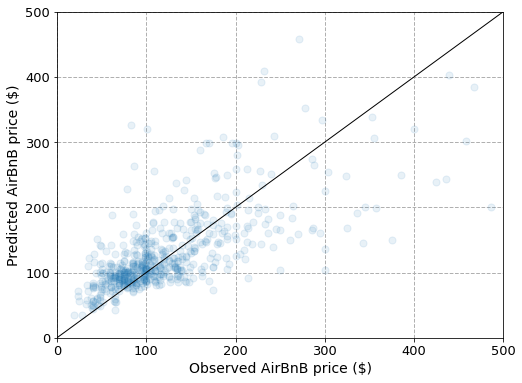

In [56]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_test, predictions, alpha=0.1, s=50, zorder=2)
ax.plot([0,500], [0, 500], color='k', lw=1, zorder=3)
ax.set_ylabel('Predicted AirBnB price ($)', fontsize=14)
ax.set_xlabel('Observed AirBnB price ($)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.grid(ls='dashed', lw=1, zorder=1)
ax.set_ylim(0,500)
ax.set_xlim(0,500)